이미지를 이용한 딥러닝에서는 fashin-MNIST 나 CIFAR-10 데이터를 사용하여 분류의 정확도를 분석하는 내용으로 진행해 주시면 됩니다.

더 다양한 분석이 가능하며, 예시로 들자면 conv, pool, dense 등의 layer를 다양하게 사용해 볼수 도 있으며, 데이터 증대, dropout 등도 고려해 볼수 있으며, 데이터 전이 학습도 가능합니다. 또한 다양한 hyper-parameter에 따른 학습도 분석할 수 있을 것 같습니다. 그리고, 이미지의 경우 결과에서 잘못 분류된 이미지나 filter도 함께 확인이 가능하여 분석에 도움을 더 줄수 있을 것으로 생각됩니다.

Epoch 1/30
391/391 - 5s - loss: 1.5860 - accuracy: 0.4293 - val_loss: 1.3190 - val_accuracy: 0.5261 - 5s/epoch - 13ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2434 - accuracy: 0.5559 - val_loss: 1.1793 - val_accuracy: 0.5891 - 4s/epoch - 11ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0870 - accuracy: 0.6166 - val_loss: 1.0789 - val_accuracy: 0.6189 - 4s/epoch - 11ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9770 - accuracy: 0.6549 - val_loss: 1.0522 - val_accuracy: 0.6296 - 4s/epoch - 11ms/step
Epoch 5/30
391/391 - 4s - loss: 0.8830 - accuracy: 0.6913 - val_loss: 0.9447 - val_accuracy: 0.6754 - 4s/epoch - 11ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8030 - accuracy: 0.7196 - val_loss: 0.9676 - val_accuracy: 0.6651 - 4s/epoch - 11ms/step
Epoch 7/30
391/391 - 5s - loss: 0.7301 - accuracy: 0.7449 - val_loss: 0.9383 - val_accuracy: 0.6777 - 5s/epoch - 12ms/step
Epoch 8/30
391/391 - 5s - loss: 0.6641 - accuracy: 0.7678 - val_loss: 0.9550 - val_accuracy: 0.6793 - 5s/epoch - 12ms/step
Epoch 9/30
391/3

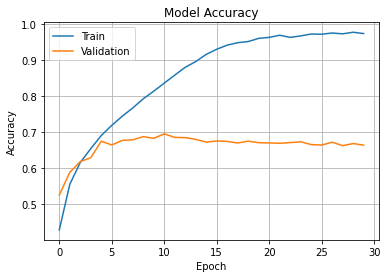

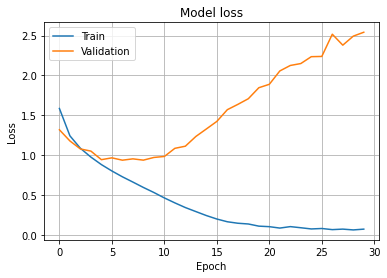

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5), padding='same', activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation ='relu'))
cnn.add(Dense(10, activation ='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [2]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 7680)              0

conv2d (5, 5, 3, 6)
conv2d_1 (5, 5, 6, 16)
conv2d_2 (5, 5, 16, 120)


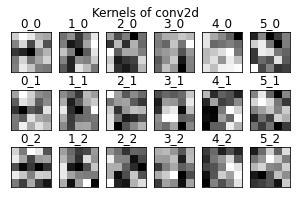

conv2d (None, 32, 32, 6)
conv2d_1 (None, 16, 16, 16)
conv2d_2 (None, 8, 8, 120)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


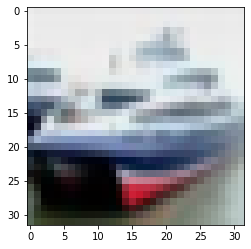

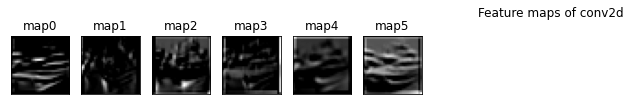

In [13]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases = layer.get_weights()
    print(layer.name, kernel.shape)

kernel, biases = cnn.layers[0].get_weights()
minv, maxv = kernel.min(), kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=6

plt.figure(figsize=(5,3))
plt.suptitle("Kernels of conv2d")
for i in range(n_kernel):
  f=kernel[:,:,:,i]
  for j in range(3):
    plt.subplot(3, n_kernel, j*n_kernel+i+1)
    plt.imshow(f[:,:,j],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)
partial_model.summary()

feature_map = partial_model.predict(x_test)
fm=feature_map[1]

plt.imshow(x_test[1])

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d")
for i in range(6):
  plt.subplot(2, 16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title("map"+str(i))
plt.show()


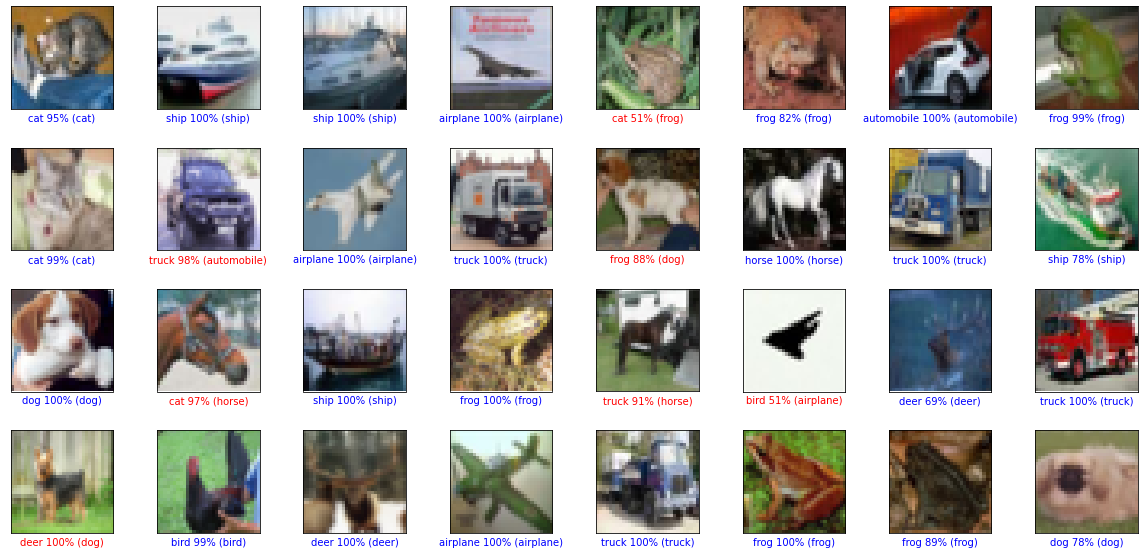

In [47]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] 
predictions = cnn.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

num_rows = 4
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()

target_Y = np.argmax(test_Y, axis=1)
    match = predicted_Y == target_Y
    wrong_label = np.where(match==False)        
    plt.show(test_X[wrong_label[0]].reshape(32, 32, 3))